# Datasets


`Nine single-cell datasets` on which they applied SCENT to create 23 cell-type-specific enhancer–gene maps. They used the Public PBMC data, which does not come with a GEO Accession number.

| **GEO Accession** | **Dataset**                |
| :---------------: | :------------------------- |
|     GSE140203     | SHARE-seq                  |
|     GSE156478     | DOGMA-seq (control & stim) |
|     GSE178707     | NEAT-seq                   |
|     GSE194122     | Neural iPS (bone marrow)   |
|     GSE193240     | Brain                      |
|     GSE178453     | Pituitary                  |
|     GSE243917     | Arthritis tissue           |


In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Arthritis Dataset

### Raw Dataset

Total number of cells across all files: 31,547

In [17]:
import scanpy as sc
import pandas as pd
from pathlib import Path
base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")
adata = sc.read_h5ad(base / "GSE243917_genesXcells_ALL_raw.h5ad")

print(adata)
print(adata.obs.head())
if "ct" in adata.obs.columns:
    arthritis_df = adata.obs["ct"].value_counts().reset_index()
    arthritis_df.columns = ["celltype", "n_cells"]
    arthritis_df["dataset"] = "Arthritis-tissue"
    arthritis_df["file"] = "GSE243917_genesXcells_ALL_raw.h5ad"
    display(arthritis_df)
    
    total_cells = arthritis_df["n_cells"].sum()
    print(f"\nTotal number of cells: {total_cells:,}")
else:
    print("No 'ct' column found in adata.obs — check available columns:")
    print(adata.obs.columns)


AnnData object with n_obs × n_vars = 31547 × 36601
    obs: 'ct', 'ct_subtype'
                                   ct                   ct_subtype
BRI-1281_AAACAGCCAATTTGGT  fibroblast     F-0: PRG4+ CLIC5+ lining
BRI-1281_AAACAGCCAGCACCAT  fibroblast     F-0: PRG4+ CLIC5+ lining
BRI-1281_AAACATGCAGGCTAGA     myeloid  M-0: MERTK+ SELENOP+ LYVE1+
BRI-1281_AAACATGCATGCTTAG  fibroblast     F-0: PRG4+ CLIC5+ lining
BRI-1281_AAACATGCATTGCAGC       Tcell       T-0: CD4+ IL7R+ memory


,celltype,n_cells,dataset,file
0,fibroblast,9905,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
1,Tcell,7949,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
2,myeloid,7333,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
3,endothelial,1967,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
4,Bcell,1544,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
5,plasma,1263,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
6,NK,932,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad
7,mural,654,Arthritis-tissue,GSE243917_genesXcells_ALL_raw.h5ad



Total number of cells: 31,547


AnnData object with n_obs × n_vars = 31547 × 36601
    obs: 'ct', 'ct_subtype'


/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:208: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")
/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:411: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


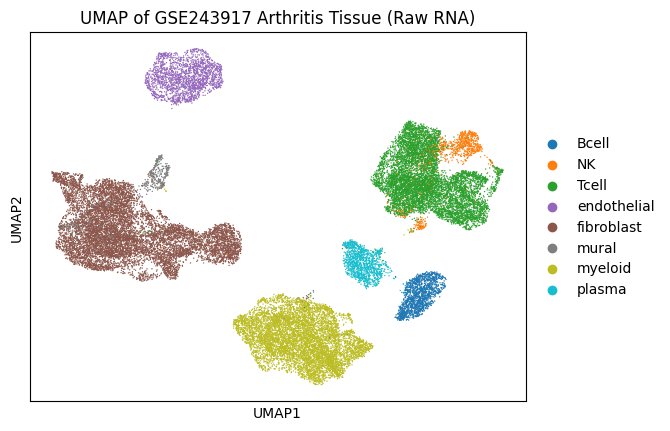

In [18]:
import scanpy as sc
from pathlib import Path
base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")
adata = sc.read_h5ad(base / "GSE243917_genesXcells_ALL_raw.h5ad")
print(adata)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="cell_ranger")
adata = adata[:, adata.var["highly_variable"]]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30, random_state=0)
sc.tl.umap(adata, random_state=0)
sc.pl.umap(
    adata,
    color="ct",          
    title="UMAP of GSE243917 Arthritis Tissue (Raw RNA)",
    palette="tab10"
)


# Processed Arthritis Dataset

In [19]:
base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")
cell_counts_arthritis = []
for f in base.glob("*_RNA_processed.h5ad"):
    adata = sc.read_h5ad(f)
    tmp = adata.obs["ct"].value_counts().reset_index()
    tmp.columns = ["celltype", "n_cells"]
    tmp["dataset"] = "Arthritis-tissue"
    tmp["file"] = f.name
    cell_counts_arthritis.append(tmp)
arthritis_df = pd.concat(cell_counts_arthritis, ignore_index=True)
arthritis_df


,celltype,n_cells,dataset,file
0,endothelial,1967,Arthritis-tissue,GSE243917_endothelial_RNA_processed.h5ad
1,Tcell,7942,Arthritis-tissue,GSE243917_T_RNA_processed.h5ad
2,fibroblast,9902,Arthritis-tissue,GSE243917_fibroblast_RNA_processed.h5ad
3,Bcell,1543,Arthritis-tissue,GSE243917_B_RNA_processed.h5ad
4,myeloid,7324,Arthritis-tissue,GSE243917_myeloid_RNA_processed.h5ad


In [20]:
total_cells = arthritis_df["n_cells"].sum()
print(f"Total number of cells across all files: {total_cells:,}")


Total number of cells across all files: 28,678


/var/folders/ch/v_m5bbwd0rb_6k_t3hrlh01w0000gn/T/ipykernel_12303/3769900635.py:14: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adatas[0].concatenate(adatas[1:], batch_key="dataset")
/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:208: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


AnnData object with n_obs × n_vars = 28678 × 872
    obs: 'ct', 'ct_subtype', 'donor', 'n_genes', 'total_counts', 'percent_mito', 'donor_num', 'source_file', 'dataset'
    var: 'mt', 'highly_variable', 'n_cells-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'n_cells-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable_nbatches-1', 'highly_variable_intersection-1', 'n_cells-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'highly_variable_nbatches-2', 'highly_variable_intersection-2', 'n_cells-3', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'highly_variable_nbatches-3', 'highly_variable_intersection-3', 'n_cells-4', 'means-4', 'dispersions-4', 'dispersions_norm-4', 'highly_variable_nbatches-4', 'highly_variable_intersection-4'
    obsm: 'X_harmonized_pca', 'X_pca', 'X_umap'


/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:411: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


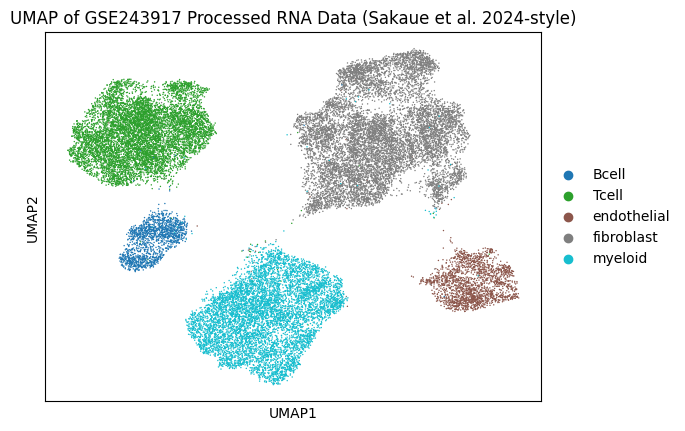

In [23]:
import scanpy as sc
from pathlib import Path

base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")
adatas = []
for f in base.glob("*_RNA_processed.h5ad"):
    adata = sc.read_h5ad(f)
    adata.obs["source_file"] = f.name
    adatas.append(adata)
adata_combined = adatas[0].concatenate(adatas[1:], batch_key="dataset")
print(adata_combined)

# --- Skip normalization/log1p/scale ---
# Run PCA and UMAP directly on the already processed data
sc.tl.pca(adata_combined, svd_solver='arpack')
sc.pp.neighbors(adata_combined, n_neighbors=15, n_pcs=20, random_state=0)
sc.tl.umap(adata_combined, random_state=0)
sc.pl.umap(
    adata_combined,
    color="ct",   
    palette="tab10",
    title="UMAP of GSE243917 Processed RNA Data (Sakaue et al. 2024-style)"
)


# Neurl IPS Dataset (GSE 194122)

In [30]:
import scanpy as sc
from pathlib import Path

base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE194122")

for f in base.glob("*_BMMC_processed.h5ad"):
    adata = sc.read_h5ad(f)
    print(f"\n📁 {f.name}")
    print("obs columns:", list(adata.obs.columns))
    print("\nPreview of first few rows:")
    display(adata.obs.head())



📁 GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad
obs columns: ['GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker']

Preview of first few rows:


,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,...,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
TAGTTGTCACCCTCAC-1-s1d1,1.061008,1508.0,1022,0.453484,S,4031.0,5400,0.746481,0.003473,0.642468,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.604230,1655.0,1081,0.455631,G2M,8636.0,19266,0.448251,0.003126,1.220679,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.650069,7230.0,3304,2.435348,G2M,4674.0,6177,0.756678,0.001284,0.692573,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.812274,1108.0,793,0.347226,G2M,2803.0,4019,0.697437,0.000714,0.633838,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.674770,1851.0,1219,0.534205,G2M,1790.0,2568,0.697040,0.003352,0.727660,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker


/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")



📁 GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad
obs columns: ['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train']

Preview of first few rows:


,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train


In [31]:
adata = sc.read_h5ad("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE194122/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

print("Unique 'Site' values:")
print(adata.obs["Site"].value_counts())


Unique 'Site' values:
Site
site4    22224
site1    17243
site2    15226
site3    14556
Name: count, dtype: int64


In [32]:
import scanpy as sc
from pathlib import Path

adata = sc.read_h5ad("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE194122/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

print(f"Original total cells: {adata.n_obs:,}")

# Quick QC — similar to Signac thresholds
sc.pp.filter_cells(adata, min_genes=500)
adata = adata[adata.obs["GEX_pct_counts_mt"] < 10]  # remove high-mt cells

print(f"Post-QC total cells: {adata.n_obs:,}")

# UMAP
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20, random_state=0)
sc.tl.umap(adata, random_state=0)

sc.pl.umap(
    adata,
    color="cell_type",
    title="NeurIPS (Bone Marrow, QC-filtered)",
    palette="tab10"
)


Original total cells: 69,249
Post-QC total cells: 69,189


/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:208: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


KeyboardInterrupt: 

In [26]:
import scanpy as sc
import pandas as pd
from pathlib import Path

base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE194122")

cell_counts_neurips = []

for f in base.glob("*_BMMC_processed.h5ad"):
    adata = sc.read_h5ad(f)
    tmp = adata.obs["cell_type"].value_counts().reset_index()
    tmp.columns = ["celltype", "n_cells"]
    tmp["dataset"] = "NeurIPS PBMC"
    tmp["file"] = f.name
    cell_counts_neurips.append(tmp)

neurips_df = pd.concat(cell_counts_neurips, ignore_index=True)
display(neurips_df)
total_cells = neurips_df["n_cells"].sum()
print(f"\nTotal number of cells across all NeurIPS PBMC datasets: {total_cells:,}")
print("\nCell counts by dataset:")
print(neurips_df.groupby("file")["n_cells"].sum())


/Users/jugomez/Library/CloudStorage/Box-Box/JuanCarlosGomez/Rotation_Project/Tools/UCE/UCE-Env/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


,celltype,n_cells,dataset,file
0,CD8+ T,11589,NeurIPS PBMC,GSE194122_openproblems_neurips2021_multiome_BM...
1,CD14+ Mono,10843,NeurIPS PBMC,GSE194122_openproblems_neurips2021_multiome_BM...
2,NK,6929,NeurIPS PBMC,GSE194122_openproblems_neurips2021_multiome_BM...
3,CD4+ T activated,5526,NeurIPS PBMC,GSE194122_openproblems_neurips2021_multiome_BM...
4,Naive CD20+ B,5052,NeurIPS PBMC,GSE194122_openproblems_neurips2021_multiome_BM...
...,...,...,...,...
62,CD4+ T CD314+ CD45RA+,93,NeurIPS PBMC,GSE194122_openproblems_neurips2021_cite_BMMC_p...
63,dnT,56,NeurIPS PBMC,GSE194122_openproblems_neurips2021_cite_BMMC_p...
64,CD8+ T naive CD127+ CD26- CD101-,42,NeurIPS PBMC,GSE194122_openproblems_neurips2021_cite_BMMC_p...
65,T prog cycling,24,NeurIPS PBMC,GSE194122_openproblems_neurips2021_cite_BMMC_p...



Total number of cells across all NeurIPS PBMC datasets: 159,510

Cell counts by dataset:
file
GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad        90261
GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad    69249
Name: n_cells, dtype: int64


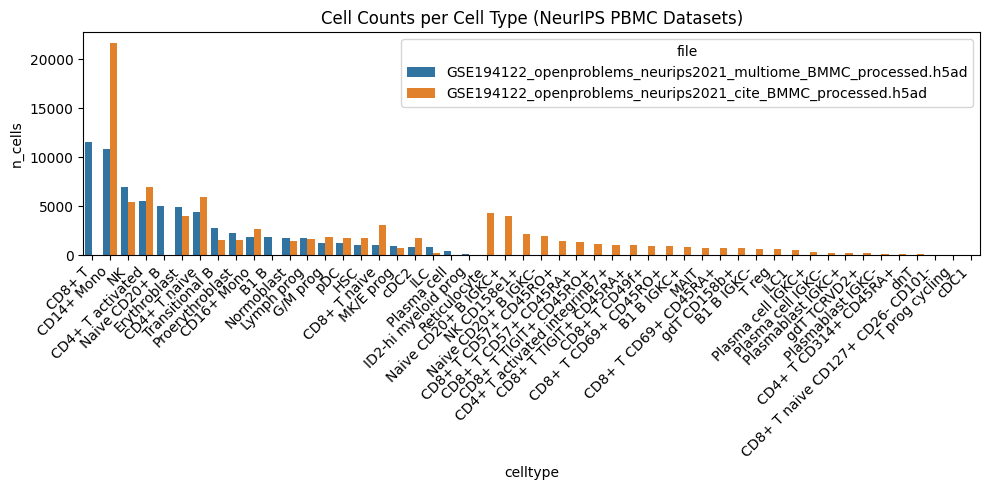

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=neurips_df, x="celltype", y="n_cells", hue="file")
plt.xticks(rotation=45, ha="right")
plt.title("Cell Counts per Cell Type (NeurIPS PBMC Datasets)")
plt.tight_layout()
plt.show()


# Re-Analysis 

# Figure 2


| **Panel** | **What it shows**                                                                                       | **Data needed**                                                                                              |
| :-------- | :------------------------------------------------------------------------------------------------------ | :----------------------------------------------------------------------------------------------------------- |
| **2a**    | Number of significant gene–peak pairs (FDR < 0.1) vs number of cells per cell type, colored by dataset. | SCENT output `.txt` files (for counts) + cell counts per cell type from `.h5` / `.h5ad` multimodal datasets. |
| **2b**    | Effect size (β) vs distance to TSS for all significant gene–peak pairs (density plot).                  | SCENT `.txt` files (columns: `beta`, `peak`, `gene`) + gene TSS reference (TxDb or GENCODE).                 |
| **2c**    | Mean β within bins of TSS distance for one dataset (Arthritis).                                         | Same as above, but subset to one dataset (e.g., Arthritis SCENT file).                                       |
| **2d**    | Mean ΔphastCons conservation score across regions (exons, SCENT peaks, all ATAC peaks).                 | SCENT peaks (`.txt`), all ATAC peaks (`.bed`), and phastCons conservation scores from UCSC (hg38).           |
| **2e**    | Enrichment of SCENT links in CRISPR-Flow FISH enhancer–promoter datasets.                               | SCENT enhancer–gene links + CRISPR-Flow FISH enhancer–gene validation data.                                  |
| **2f**    | Enrichment of SCENT links in H3K27ac HiChIP loops (T cell data).                                        | SCENT links + H3K27ac HiChIP enhancer–promoter interaction data.                                             |


## Number of SCENT peak–gene pairs (FDR < 10%) vs. Number of cells per cell type per dataset

| Axis  | Variable                                              | Source Files                                                                                                      | Directory                                                            |
| ----- | ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **X** | Number of cells per cell type                         | `.h5`, `.h5ad`, or `.rds` single-cell multimodal count matrices (these hold RNA + ATAC data and cell type labels) | `GSE178453/`, `GSE178707/`, `GSE193240/`, `GSE194122/`, `GSE243917/` |
| **Y** | Number of significant enhancer–gene pairs (FDR < 0.1) | SCENT output text tables (`*_allqced_bootpkg_nopc_allCT.FDR0.10.txt`)                                             | `SCENT_enhancer_gene_linkages/`                                      |




/Data/SCENT_enhancer_gene_linkages/

├── Arthritis-tissue_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── Brain_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── Dogma_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── NeurIPS_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── NEAT_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── Pituitary_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── Pubic-PBMC_allqced_bootpkg_nopc_allCT.FDR0.10.txt

├── SHARE_allqced_bootpkg_nopc_allCT.FDR0.10.txt



# Number of significant enhancer–gene links (FDR < 10 %) vs Number of cells per cell type per dataset.


To make that plot we need, for each dataset:

1. A file giving number of **enhancer–gene links per cell type** (from the SCENT output).

2. A file giving number of cells per cell type (→ from each dataset’s raw or processed data).

In [2]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Arthritis Tissue  GSE243917

GSE243917_endothelial_RNA_processed.h5ad

GSE243917_fibroblast_RNA_processed.h5ad

GSE243917_myeloid_RNA_processed.h5ad

GSE243917_B_RNA_processed.h5ad

GSE243917_T_RNA_processed.h5ad

GSE243917_ATAC_ALL_CT_processed.h5ad



In [3]:
# base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")

# cell_counts_arthritis = []
# for f in base.glob("*_RNA_processed.h5ad"):
#     adata = sc.read_h5ad(f)
#     tmp = adata.obs["ct"].value_counts().reset_index()
#     tmp.columns = ["celltype", "n_cells"]
#     tmp["dataset"] = "Arthritis-tissue"
#     tmp["file"] = f.name
#     cell_counts_arthritis.append(tmp)

# arthritis_df = pd.concat(cell_counts_arthritis, ignore_index=True)
# print(arthritis_df)


      celltype  n_cells           dataset  \
0  endothelial     1967  Arthritis-tissue   
1        Tcell     7942  Arthritis-tissue   
2   fibroblast     9902  Arthritis-tissue   
3        Bcell     1543  Arthritis-tissue   
4      myeloid     7324  Arthritis-tissue   

                                       file  
0  GSE243917_endothelial_RNA_processed.h5ad  
1            GSE243917_T_RNA_processed.h5ad  
2   GSE243917_fibroblast_RNA_processed.h5ad  
3            GSE243917_B_RNA_processed.h5ad  
4      GSE243917_myeloid_RNA_processed.h5ad  


In [13]:
scent_path = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages/Arthritis-tissue_allqced_bootpkg_nopc_allCT.FDR0.10.txt")
scent_arthritis = pd.read_csv(scent_path, sep="\t")


scent_summary = scent_arthritis["celltype"].value_counts().reset_index()
scent_summary.columns = ["celltype", "n_links"]
scent_summary["dataset"] = "Arthritis-tissue"
scent_summary["celltype"] = scent_summary["celltype"].str.lower()

print("SCENT summary (Arthritis):")
print(scent_summary, "\n")
base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")

cell_counts_arthritis = []
for f in base.glob("*_RNA_processed.h5ad"):
    adata = sc.read_h5ad(f)
    tmp = adata.obs["ct"].value_counts().reset_index()
    tmp.columns = ["celltype", "n_cells"]
    tmp["dataset"] = "Arthritis-tissue"
    tmp["file"] = f.name
    cell_counts_arthritis.append(tmp)

arthritis_df = pd.concat(cell_counts_arthritis, ignore_index=True)
arthritis_df["celltype"] = arthritis_df["celltype"].str.lower()  # normalize case

print("Cell counts summary (Arthritis):")
print(arthritis_df, "\n")

merged_arthritis = pd.merge(
    scent_summary,
    arthritis_df[["celltype", "n_cells", "dataset"]],
    on=["celltype", "dataset"],
    how="inner"
)

print("Merged Arthritis DataFrame:")
print(merged_arthritis, "\n")

SCENT summary (Arthritis):
      celltype  n_links           dataset
0   fibroblast    22963  Arthritis-tissue
1      myeloid    12116  Arthritis-tissue
2          tnk     7523  Arthritis-tissue
3        bcell     4208  Arthritis-tissue
4  endothelial      717  Arthritis-tissue 

Cell counts summary (Arthritis):
      celltype  n_cells           dataset  \
0  endothelial     1967  Arthritis-tissue   
1        tcell     7942  Arthritis-tissue   
2   fibroblast     9902  Arthritis-tissue   
3        bcell     1543  Arthritis-tissue   
4      myeloid     7324  Arthritis-tissue   

                                       file  
0  GSE243917_endothelial_RNA_processed.h5ad  
1            GSE243917_T_RNA_processed.h5ad  
2   GSE243917_fibroblast_RNA_processed.h5ad  
3            GSE243917_B_RNA_processed.h5ad  
4      GSE243917_myeloid_RNA_processed.h5ad   

Merged Arthritis DataFrame:
      celltype  n_links           dataset  n_cells
0   fibroblast    22963  Arthritis-tissue     9902
1      

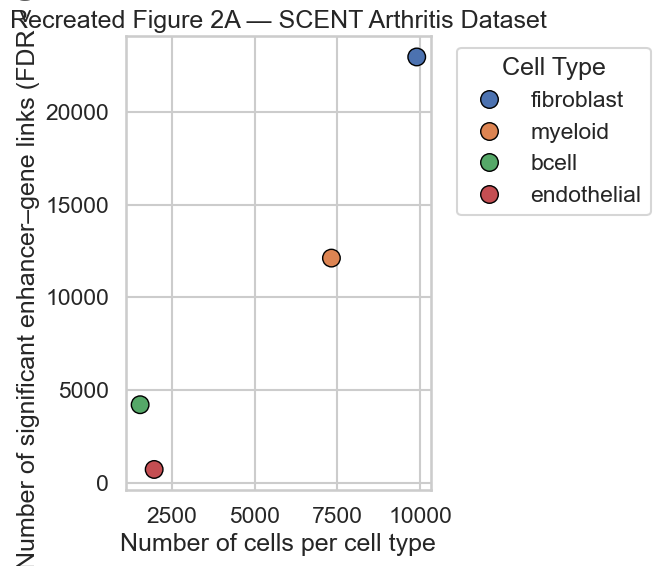

In [15]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=merged_arthritis,
    x="n_cells",
    y="n_links",
    hue="celltype",
    s=160,
    edgecolor="black"
)

plt.xlabel("Number of cells per cell type")
plt.ylabel("Number of significant enhancer–gene links (FDR < 0.1)")
plt.title("Recreated Figure 2A — SCENT Arthritis Dataset")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# NeurIPS  GSE194122 Dataset

In [5]:
neurips_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE194122/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad"
adata_neurips = sc.read_h5ad(neurips_path)

neurips_counts = adata_neurips.obs["cell_type"].value_counts().reset_index()
neurips_counts.columns = ["celltype", "n_cells"]
neurips_counts["dataset"] = "NeurIPS"

print(neurips_counts.head())


           celltype  n_cells  dataset
0            CD8+ T    11589  NeurIPS
1        CD14+ Mono    10843  NeurIPS
2                NK     6929  NeurIPS
3  CD4+ T activated     5526  NeurIPS
4     Naive CD20+ B     5052  NeurIPS


# Dogma-seq  GSE178707 Dataset

In [6]:
dogma_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE178707/GSM5396328_cell_calls.tsv"
dogma_df = pd.read_csv(dogma_path, sep="\t")

dogma_counts = dogma_df["ADT_hash_assignment"].value_counts().reset_index()
dogma_counts.columns = ["celltype", "n_cells"]
dogma_counts["dataset"] = "Dogma"

print(dogma_counts)


  celltype  n_cells dataset
0     NPC5      264   Dogma
1     NPC8      245   Dogma
2     NPC9      242   Dogma
3     NPC6      217   Dogma
4     NPC7      210   Dogma


# Public PBMC Dataset

In [5]:
scent_path = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages/Pubic-PBMC_allqced_bootpkg_nopc_allCT.FDR0.10.txt")
scent_pbmc = pd.read_csv(scent_path, sep="\t")

scent_summary = scent_pbmc["celltype"].value_counts().reset_index()
scent_summary.columns = ["celltype", "n_links"]
scent_summary["dataset"] = "PBMC"

print("SCENT summary (PBMC):")
print(scent_summary, "\n")
pbmc_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/PBMC"
adata_pbmc = sc.read_10x_mtx(pbmc_path, var_names="gene_symbols", cache=True)
n_total_cells = adata_pbmc.n_obs
print(f"Total PBMC cells: {n_total_cells}")
scent_summary["n_cells"] = n_total_cells

print("Merged PBMC summary (ready for plotting):")
print(scent_summary, "\n")



SCENT summary (PBMC):
  celltype  n_links dataset
0      Tnk     7936    PBMC
1  Myeloid     7403    PBMC
2    Bcell     1235    PBMC 

Total PBMC cells: 11485
Merged PBMC summary (ready for plotting):
  celltype  n_links dataset  n_cells
0      Tnk     7936    PBMC    11485
1  Myeloid     7403    PBMC    11485
2    Bcell     1235    PBMC    11485 



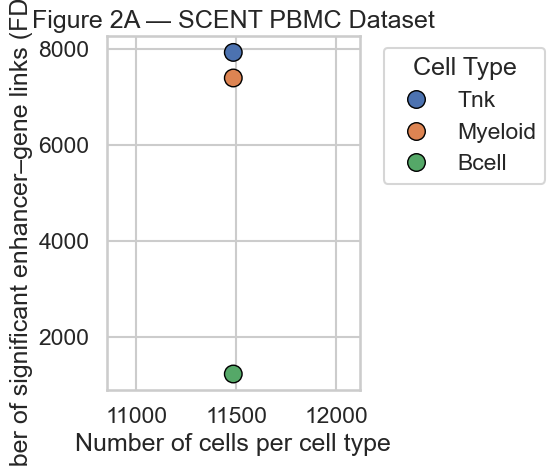

In [6]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=scent_summary,
    x="n_cells",
    y="n_links",
    hue="celltype",
    s=160,
    edgecolor="black"
)

plt.xlabel("Number of cells per cell type")
plt.ylabel("Number of significant enhancer–gene links (FDR < 0.1)")
plt.title("Figure 2A — SCENT PBMC Dataset")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Brain 

In [7]:
scent_path = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages/Brain_allqced_bootpkg_nopc_allCT.FDR0.10.txt")
scent_brain = pd.read_csv(scent_path, sep="\t")

scent_summary = scent_brain["celltype"].value_counts().reset_index()
scent_summary.columns = ["celltype", "n_links"]
scent_summary["dataset"] = "brain"

print("SCENT summary (Brain):")
print(scent_summary.head(), "\n")

brain_ct_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE140203/GSM4156599_brain_celltype.txt"
brain_ct = pd.read_csv(brain_ct_path, sep="\t")

print("Columns in brain_celltype.txt:", brain_ct.columns.tolist())

brain_counts = brain_ct["celltype"].value_counts().reset_index()
brain_counts.columns = ["celltype", "n_cells"]
brain_counts["dataset"] = "brain"

mapping = {
    "EN": "EXCNEU",
    "IN": "INHNEU",
    "MX": "MIGL",
    "P": "OLIGO",
    "O": "OPC",
    "A": "ASTRO"
}
brain_counts["celltype_grouped"] = brain_counts["celltype"].str.extract(r"([A-Z]+)")[0].map(mapping)

brain_counts_grouped = (
    brain_counts.groupby(["celltype_grouped", "dataset"])["n_cells"]
    .sum()
    .reset_index()
    .rename(columns={"celltype_grouped": "celltype"})
)

print("Brain cell counts grouped:")
print(brain_counts_grouped, "\n")

scent_summary.columns = scent_summary.columns.str.strip()
brain_counts_grouped.columns = brain_counts_grouped.columns.str.strip()
brain_counts_grouped = brain_counts_grouped[["celltype", "n_cells", "dataset"]]

merged_brain = pd.merge(
    scent_summary,
    brain_counts_grouped,
    on=["dataset", "celltype"],
    how="inner"
)

print("Merged Brain DataFrame:")
print(merged_brain, "\n")




SCENT summary (Brain):
  celltype  n_links dataset
0      OPC     4917   brain
1   INHNEU     4120   brain
2     MIGL     2783   brain
3   EXCNEU     2173   brain
4    ASTRO      785   brain 

Columns in brain_celltype.txt: ['atac.bc', 'rna.bc', 'celltype']
Brain cell counts grouped:
  celltype dataset  n_cells
0    ASTRO   brain      137
1   EXCNEU   brain     1579
2   INHNEU   brain     1003
3     MIGL   brain      185
4    OLIGO   brain      153 

Merged Brain DataFrame:
  celltype  n_links dataset  n_cells
0   INHNEU     4120   brain     1003
1     MIGL     2783   brain      185
2   EXCNEU     2173   brain     1579
3    ASTRO      785   brain      137
4    OLIGO      157   brain      153 



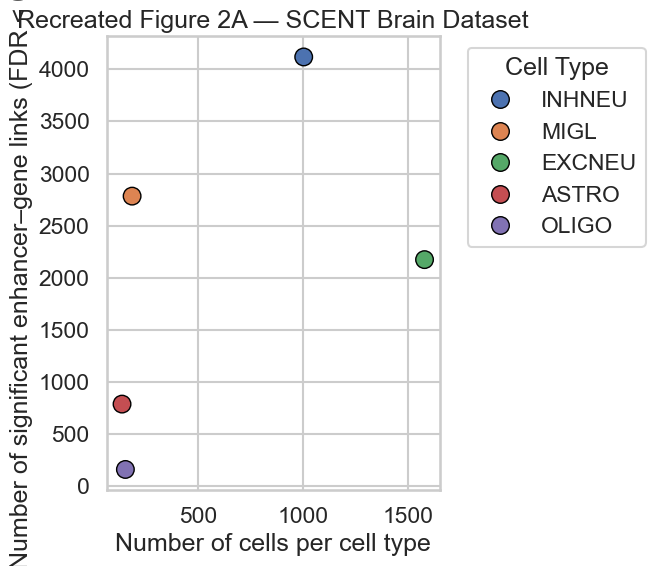

In [8]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(7, 6))

sns.scatterplot(
    data=merged_brain,
    x="n_cells",
    y="n_links",
    hue="celltype",
    s=160,
    edgecolor="black"
)

plt.xlabel("Number of cells per cell type")
plt.ylabel("Number of significant enhancer–gene links (FDR < 0.1)")
plt.title("Recreated Figure 2A — SCENT Brain Dataset")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Combine all Datasets

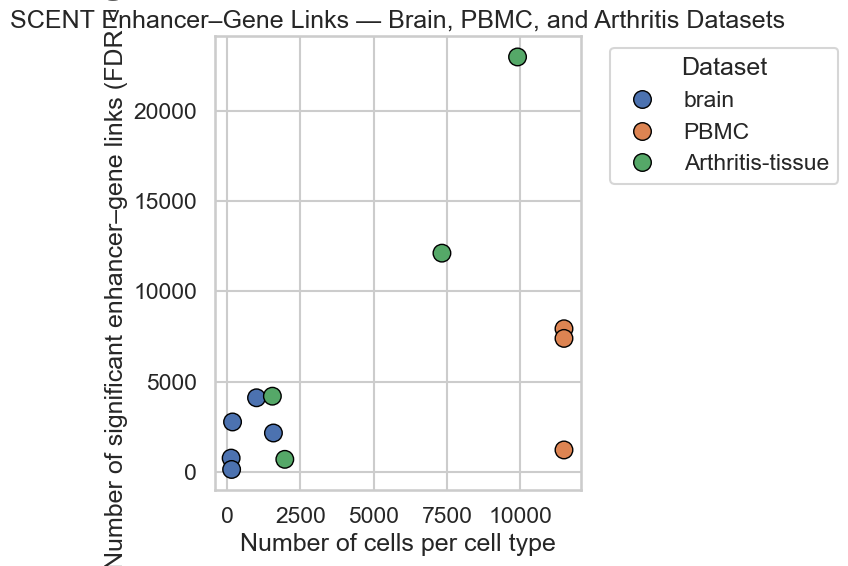

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from pathlib import Path
scent_path_pbmc = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages/Pubic-PBMC_allqced_bootpkg_nopc_allCT.FDR0.10.txt")
scent_pbmc = pd.read_csv(scent_path_pbmc, sep="\t")
scent_summary_pbmc = scent_pbmc["celltype"].value_counts().reset_index()
scent_summary_pbmc.columns = ["celltype", "n_links"]
scent_summary_pbmc["dataset"] = "PBMC"

# Load 10x PBMC matrix
pbmc_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/PBMC"
adata_pbmc = sc.read_10x_mtx(pbmc_path, var_names="gene_symbols", cache=True)
n_total_cells = adata_pbmc.n_obs
pbmc_counts = scent_summary_pbmc[["celltype"]].copy()
pbmc_counts["n_cells"] = n_total_cells
pbmc_counts["dataset"] = "PBMC"

merged_pbmc = pd.merge(
    scent_summary_pbmc,
    pbmc_counts,
    on=["celltype", "dataset"],
    how="inner"
)
scent_path_arthritis = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages/Arthritis-tissue_allqced_bootpkg_nopc_allCT.FDR0.10.txt")
scent_arthritis = pd.read_csv(scent_path_arthritis, sep="\t")

scent_summary_arthritis = scent_arthritis["celltype"].value_counts().reset_index()
scent_summary_arthritis.columns = ["celltype", "n_links"]
scent_summary_arthritis["dataset"] = "Arthritis-tissue"
scent_summary_arthritis["celltype"] = scent_summary_arthritis["celltype"].str.lower()

base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")

cell_counts_arthritis = []
for f in base.glob("*_RNA_processed.h5ad"):
    adata = sc.read_h5ad(f)
    tmp = adata.obs["ct"].value_counts().reset_index()
    tmp.columns = ["celltype", "n_cells"]
    tmp["dataset"] = "Arthritis-tissue"
    cell_counts_arthritis.append(tmp)

arthritis_df = pd.concat(cell_counts_arthritis, ignore_index=True)
arthritis_df["celltype"] = arthritis_df["celltype"].str.lower()

merged_arthritis = pd.merge(
    scent_summary_arthritis,
    arthritis_df[["celltype", "n_cells", "dataset"]],
    on=["celltype", "dataset"],
    how="inner"
)

combined_df = pd.concat([merged_brain, merged_pbmc, merged_arthritis], ignore_index=True)
combined_df["n_cells"] = pd.to_numeric(combined_df["n_cells"], errors="coerce")
combined_df["n_links"] = pd.to_numeric(combined_df["n_links"], errors="coerce")
combined_df = combined_df.dropna(subset=["n_cells", "n_links", "dataset"])
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_df,
    x="n_cells",
    y="n_links",
    hue="dataset",
    s=160,
    edgecolor="black"
)

plt.xlabel("Number of cells per cell type")
plt.ylabel("Number of significant enhancer–gene links (FDR < 0.1)")
plt.title("SCENT Enhancer–Gene Links — Brain, PBMC, and Arthritis Datasets")
plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Load the SCENT enhancer–gene link results

In [15]:
import pandas as pd
from pathlib import Path

scent_dir = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/SCENT_enhancer_gene_linkages")

scent_counts = []
for f in scent_dir.glob("*FDR0.10.txt"):
    dataset = f.name.split("_")[0]
    df = pd.read_csv(f, sep="\t")
    cell_col = next((c for c in df.columns if c.lower() in ["celltype", "cell_type", "ct"]), None)
    if not cell_col:
        continue
    counts = df.groupby(cell_col).size().reset_index(name="n_links")
    counts.columns = ["celltype", "n_links"]
    counts["dataset"] = dataset
    scent_counts.append(counts)

scent_df = pd.concat(scent_counts, ignore_index=True)
scent_df["celltype"] = scent_df["celltype"].str.lower()
scent_df["dataset"] = scent_df["dataset"].replace({
    "Pubic-PBMC": "PBMC", "Arthritis-tissue": "Arthritis", "Dogma": "Dogma", "NeurIPS": "NeurIPS"
})
print(scent_df["dataset"].unique())


['Arthritis' 'Dogma' 'SHARE' 'NeurIPS' 'Brain' 'PBMC' 'Pituitary' 'NEAT']


In [58]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations


In [55]:
# Path to your ATAC peaks x cells matrix
adata_path = "/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917/GSE243917_peaksXcells_ALL_raw.h5ad"

adata = sc.read_h5ad(adata_path)
print(adata)
print("obs columns:", adata.obs.columns)


AnnData object with n_obs × n_vars = 31547 × 132520
    obs: 'ct', 'ct_subtype'
obs columns: Index(['ct', 'ct_subtype'], dtype='object')


In [56]:
celltypes = adata.obs['ct'].unique().tolist()
peak_activity = {}

for ct in celltypes:
    subset = adata[adata.obs['ct'] == ct]
    # Mean accessibility per peak
    mean_acc = np.array(subset.X.mean(axis=0)).flatten()
    top_thresh = np.quantile(mean_acc, 0.9)
    active_idx = np.where(mean_acc >= top_thresh)[0]
    active_peaks = adata.var_names[active_idx]
    peak_activity[ct] = set(active_peaks)
    print(f"{ct}: {len(active_peaks)} active peaks")


fibroblast: 13252 active peaks
myeloid: 13253 active peaks
Tcell: 13253 active peaks
NK: 13255 active peaks
endothelial: 13253 active peaks
mural: 13298 active peaks
Bcell: 13253 active peaks
plasma: 13252 active peaks


In [59]:
rows = []
for ct1, ct2 in combinations(celltypes, 2):
    inter = len(peak_activity[ct1].intersection(peak_activity[ct2]))
    union = len(peak_activity[ct1].union(peak_activity[ct2]))
    jaccard = inter / union if union > 0 else 0
    rows.append((ct1, ct2, jaccard))

jaccard_df = pd.DataFrame(rows, columns=["ct1", "ct2", "Jaccard"])


/var/folders/ch/v_m5bbwd0rb_6k_t3hrlh01w0000gn/T/ipykernel_12303/698662543.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6339929720732383' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_df.loc[ct1, ct2] = j
/var/folders/ch/v_m5bbwd0rb_6k_t3hrlh01w0000gn/T/ipykernel_12303/698662543.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6339929720732383' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_df.loc[ct2, ct1] = j
/var/folders/ch/v_m5bbwd0rb_6k_t3hrlh01w0000gn/T/ipykernel_12303/698662543.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.601123595505618' has dtype incompatible with int64, please explicitly cast to a compatible d

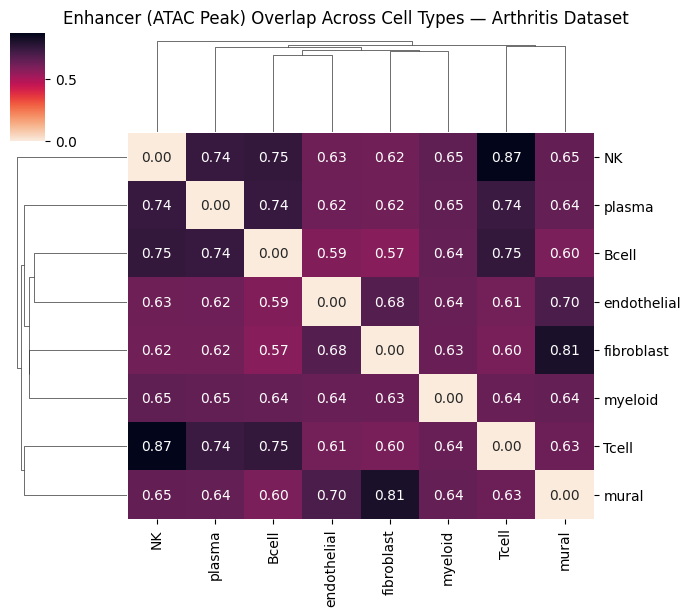

In [60]:
# Make square matrix with all cell types
celltypes_sorted = sorted(celltypes)
heatmap_df = pd.DataFrame(0, index=celltypes_sorted, columns=celltypes_sorted)

# Fill in symmetric Jaccard values
for _, row in jaccard_df.iterrows():
    ct1, ct2, j = row["ct1"], row["ct2"], row["Jaccard"]
    heatmap_df.loc[ct1, ct2] = j
    heatmap_df.loc[ct2, ct1] = j

# Diagonal = 1 (perfect overlap with itself)
np.fill_diagonal(heatmap_df.values, 1)

sns.clustermap(
    heatmap_df,
    cmap="rocket_r",
    annot=True,
    fmt=".2f",
    figsize=(7, 6),
)
plt.suptitle("Enhancer (ATAC Peak) Overlap Across Cell Types — Arthritis Dataset", y=1.02)
plt.show()


In [61]:
from collections import Counter

peak_counts = Counter(p for peaks in peak_activity.values() for p in peaks)
peak_df = pd.DataFrame.from_dict(peak_counts, orient="index", columns=["n_celltypes"])
peak_df["class"] = np.where(peak_df["n_celltypes"] > 1, "shared", "private")

# Summary
summary = peak_df["class"].value_counts(normalize=True) * 100
print("\nPercent of peaks by category:")
print(summary.round(2))



Percent of peaks by category:
class
shared     71.41
private    28.59
Name: proportion, dtype: float64


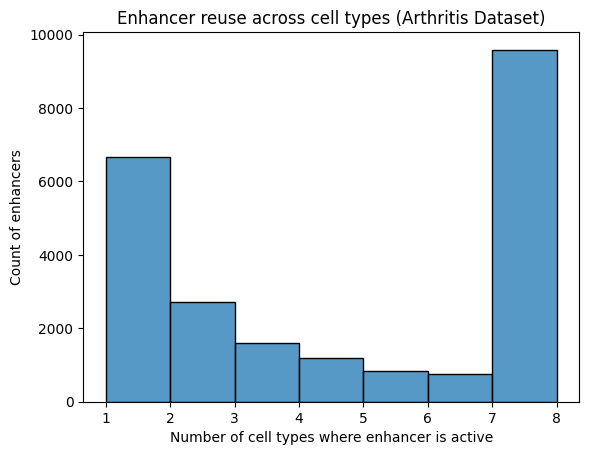

In [62]:
sns.histplot(peak_df["n_celltypes"], bins=range(1, len(celltypes)+1))
plt.xlabel("Number of cell types where enhancer is active")
plt.ylabel("Count of enhancers")
plt.title("Enhancer reuse across cell types (Arthritis Dataset)")
plt.show()


In [63]:
if "distance_to_TSS" in adata.var.columns:
    peak_info = adata.var[["distance_to_TSS"]].copy()
else:
    print("No distance info — we’ll compute it next.")


No distance info — we’ll compute it next.


In [2]:
import scanpy as sc
import pandas as pd
import pybedtools
from pathlib import Path

# Paths
base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")
gtf_path = Path("/Users/jugomez/Documents/Biological_and_Medical_Informatics/Classes/BMI206_Statistical_Methods/Group_Project/gencode.v38.annotation.gtf")

# Load ATAC peaks x cells matrix
adata = sc.read_h5ad(base / "GSE243917_peaksXcells_ALL_raw.h5ad")
print(f"Loaded {adata.n_vars:,} peaks across {adata.n_obs:,} cells.")


ModuleNotFoundError: No module named 'pybedtools'

In [1]:
import pandas as pd

# Parse peak coordinates
peaks = adata.var_names.to_series().str.split("[:-]", expand=True)
peaks.columns = ["chrom", "start", "end"]
peaks["start"] = peaks["start"].astype(int)
peaks["end"] = peaks["end"].astype(int)

# Create BED file for peaks
peaks_bed = pybedtools.BedTool.from_dataframe(peaks)
print(f"Created BedTool object with {len(peaks)} peaks.")


NameError: name 'adata' is not defined

In [48]:
import scanpy as sc
import pandas as pd
from pathlib import Path

base = Path("/Users/jugomez/Library/CloudStorage/Box-Box/BMI 206 Project/Data/GSE243917")

adata_atac = sc.read_h5ad(base / "GSE243917_peaksXcells_ALL_raw.h5ad")
print(adata_atac)
print(adata_atac.obs["ct"].value_counts())


AnnData object with n_obs × n_vars = 31547 × 132520
    obs: 'ct', 'ct_subtype'
ct
fibroblast     9905
Tcell          7949
myeloid        7333
endothelial    1967
Bcell          1544
plasma         1263
NK              932
mural           654
Name: count, dtype: int64


In [49]:
import numpy as np

celltypes = adata_atac.obs["ct"].unique()
peak_activity = {}

for ct in celltypes:
    subset = adata_atac[adata_atac.obs["ct"] == ct]
    mean_access = np.asarray(subset.X.mean(axis=0)).ravel()
    active = adata_atac.var_names[mean_access > np.percentile(mean_access, 90)]
    peak_activity[ct] = set(active)


In [50]:
import itertools
import pandas as pd

overlap = []
for ct1, ct2 in itertools.combinations(celltypes, 2):
    shared = len(peak_activity[ct1] & peak_activity[ct2])
    union  = len(peak_activity[ct1] | peak_activity[ct2])
    jaccard = shared / union
    overlap.append([ct1, ct2, jaccard])

jaccard_df = pd.DataFrame(overlap, columns=["ct1", "ct2", "Jaccard"])
